In [4]:
import pathlib
import pandas as pd

BASE_DIR = pathlib.Path().resolve().parent
project_directory = BASE_DIR/"pandas_deep_dive"
csv_directory = project_directory/"csv_data"

print(BASE_DIR, csv_directory.exists())

C:\Users\vipin\python_projects\data_analysis True


In [6]:
df = pd.read_csv(csv_directory/"big_data.csv")


In [14]:
def cleaned_row(row):
    row['salary'] = f"{row['salary']:,.2f}"
    row['sdj_Salary'] = f"{row['adj_salary']:,.2f}"
    
    return row

cleaned_data = df.copy().apply(cleaned_row, axis=1)
cleaned_data.head()

,player,salary,adj_salary,year_start,year_end,date,inflation_rate_percent,multiplier,adj_salary_audit,audit_delta,sdj_Salary
0,Patrick Ewing,"4,250,000.00",8434466.0,1990,1991,1990-12-31,1.05398,1.98082,8.418487e+06,-15979.285442,"8,434,466.00"
1,Hot Rod Williams,"3,785,000.00",7511636.0,1990,1991,1990-12-31,1.05398,1.98082,7.497405e+06,-14230.773035,"7,511,636.00"
2,Hakeem Olajuwon,"3,175,000.00",6301042.0,1990,1991,1990-12-31,1.05398,1.98082,6.289105e+06,-11937.219124,"6,301,042.00"
3,Charles Barkley,"2,900,000.00",5755283.0,1990,1991,1990-12-31,1.05398,1.98082,5.744379e+06,-10903.830066,"5,755,283.00"
4,Chris Mullin,"2,850,000.00",5656054.0,1990,1991,1990-12-31,1.05398,1.98082,5.645338e+06,-10715.850237,"5,656,054.00"


<Axes: title={'center': '#Number of players'}, xlabel='year_start,year_end'>

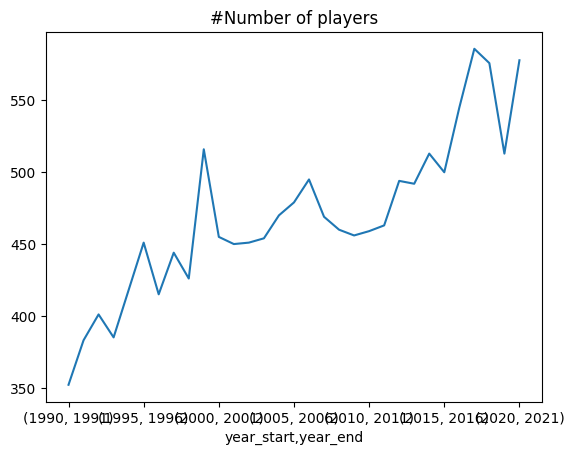

In [21]:
grouped = df.groupby('year_start')['year_end'].value_counts()
grouped.plot(title="#Number of players")